In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os


In [98]:
import sklearn
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import imblearn

from imblearn.over_sampling import RandomOverSampler


In [99]:
def reduce_mem_usage(df, verbose=True):  #reduce memory usage
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [100]:
#Load train data
train_data = reduce_mem_usage(pd.read_csv('application_train.csv'))

#Load test data
test_data = reduce_mem_usage(pd.read_csv('application_test.csv'))


Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


# Exploration data

Overview dataframe

In [101]:
print('Training data shape: ', train_data.shape)
train_data.head() #Overview train data

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311279,0.622070,NaN,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002,reg oper account,block of flats,0.071411,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,

In [102]:
print('Test data shape: ', test_data.shape)
test_data.head() #Overview test data

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018845,-19241,-2329,-5168.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752441,0.789551,0.159546,0.065979,0.058990,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.050507,NaN,NaN,0.067200,0.061188,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.052612,NaN,NaN,0.066589,0.058990,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.051392,NaN,NaN,NaN,block of flats,0.039215,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035797,-18064,-4469,-9120.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564941,0.291748,0.432861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019104,-20038,-4458,-2176.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699707,0.610840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secon

In [103]:
train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Visualize train data

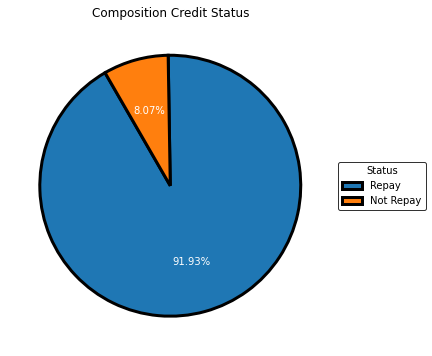

In [104]:
y_value_counts = train_data['TARGET'].value_counts()  #visualize composition of credit

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Will Repay","Will not Repay"]

data = [y_value_counts[0], y_value_counts[1]]

pie_1 = ax.pie(data,explode = (0,0),
        textprops=dict(size= 10, color= "white"),
        autopct="%.2f%%",startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))

labels="Repay","Not Repay"

plt.title('Composition Credit Status')
plt.legend( labels, title="Status",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")

Distribution train dataset

In [105]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):  #define for ditribution data
 ind = np.arange(data.shape[0])

 if len(data[xtick].unique())<5:
    plt.figure(figsize=(5,5))
 elif len(data[xtick].unique())>=5 & len(data[xtick].unique())<10:
    plt.figure(figsize=(7,7))
 else:
    plt.figure(figsize=(10,10))
    
 p1 = plt.bar(ind, data[col3].values)
 p2 = plt.bar(ind, data[col2].values)
 
 plt.ylabel('Loans')

 plt.xticks(ticks=ind, rotation=90,labels= list(data[xtick].values))
 plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
 
 plt.show()

def barplots(data, col1, col2='TARGET', top=False):
    temp = pd.DataFrame(train_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total'] = pd.DataFrame(train_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(train_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']


    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp)

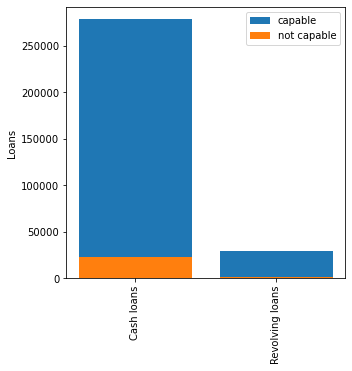

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   23221  278232  0.083459
1    Revolving loans    1604   29279  0.054783


In [106]:

barplots(train_data, 'NAME_CONTRACT_TYPE', 'TARGET')


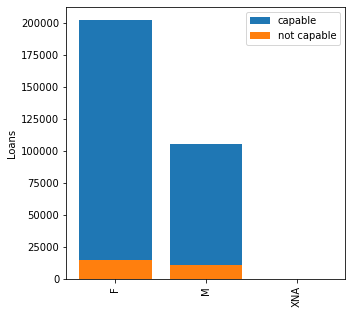

  CODE_GENDER  TARGET   total       Avg
0           F   14170  202448  0.069993
1           M   10655  105059  0.101419
2         XNA       0       4  0.000000


In [107]:
barplots(train_data, 'CODE_GENDER', 'TARGET')


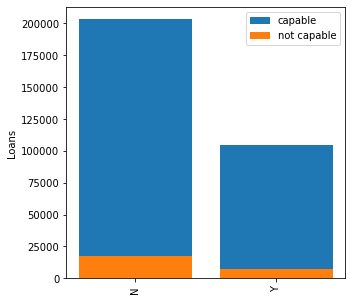

  FLAG_OWN_CAR  TARGET   total       Avg
0            N   17249  202924  0.085002
1            Y    7576  104587  0.072437


In [108]:
barplots(train_data, 'FLAG_OWN_CAR', 'TARGET')

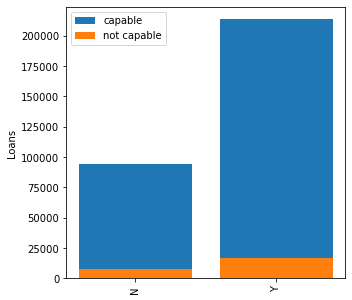

  FLAG_OWN_REALTY  TARGET   total       Avg
0               N    7842   94199  0.083249
1               Y   16983  213312  0.079616


In [109]:
barplots(train_data, 'FLAG_OWN_REALTY', 'TARGET')

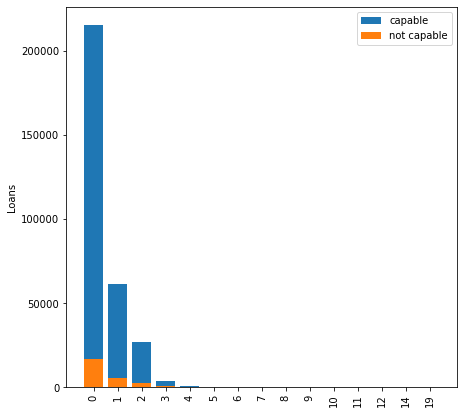

    CNT_CHILDREN  TARGET   total       Avg
0              0   16609  215371  0.077118
1              1    5454   61119  0.089236
2              2    2333   26749  0.087218
3              3     358    3717  0.096314
4              4      55     429  0.128205
5              5       7      84  0.083333
6              6       6      21  0.285714
7              7       0       7  0.000000
8              8       0       2  0.000000
9              9       2       2  1.000000
10            10       0       2  0.000000
11            11       1       1  1.000000
12            12       0       2  0.000000
13            14       0       3  0.000000
14            19       0       2  0.000000


In [110]:
barplots(train_data, 'CNT_CHILDREN', 'TARGET')

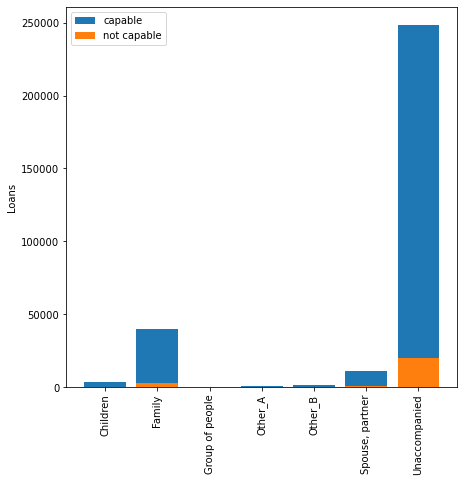

   NAME_TYPE_SUITE  TARGET   total       Avg
0         Children     241    3267  0.073768
1           Family    3009   40149  0.074946
2  Group of people      23     271  0.084871
3          Other_A      76     866  0.087760
4          Other_B     174    1770  0.098305
5  Spouse, partner     895   11370  0.078716
6    Unaccompanied   20337  248526  0.081830


In [111]:
barplots(train_data, 'NAME_TYPE_SUITE', 'TARGET')

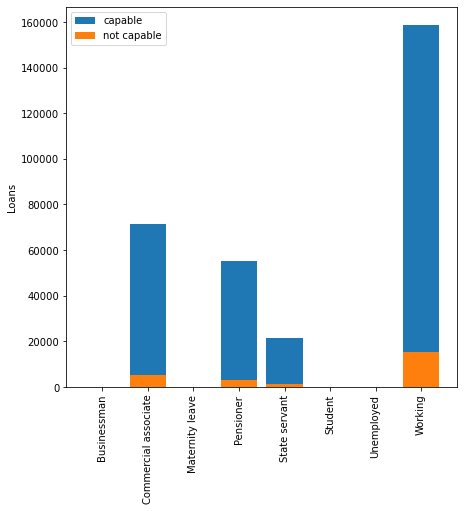

       NAME_INCOME_TYPE  TARGET   total       Avg
0           Businessman       0      10  0.000000
1  Commercial associate    5360   71617  0.074843
2       Maternity leave       2       5  0.400000
3             Pensioner    2982   55362  0.053864
4         State servant    1249   21703  0.057550
5               Student       0      18  0.000000
6            Unemployed       8      22  0.363636
7               Working   15224  158774  0.095885


In [112]:
barplots(train_data, 'NAME_INCOME_TYPE', 'TARGET')

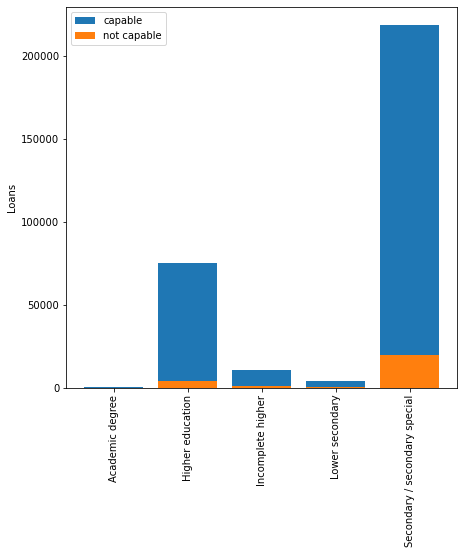

             NAME_EDUCATION_TYPE  TARGET   total       Avg
0                Academic degree       3     164  0.018293
1               Higher education    4009   74863  0.053551
2              Incomplete higher     872   10277  0.084850
3                Lower secondary     417    3816  0.109277
4  Secondary / secondary special   19524  218391  0.089399


In [113]:
barplots(train_data, 'NAME_EDUCATION_TYPE', 'TARGET')


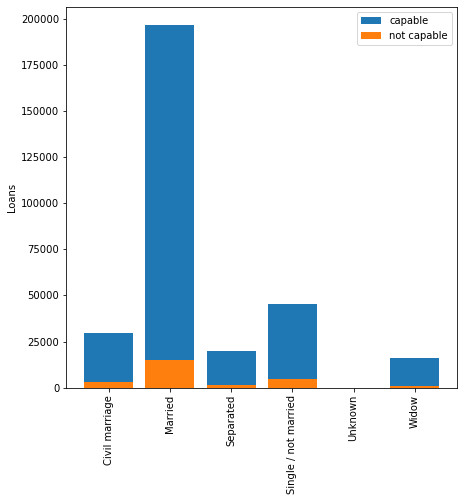

     NAME_FAMILY_STATUS  TARGET   total       Avg
0        Civil marriage    2961   29775  0.099446
1               Married   14850  196432  0.075599
2             Separated    1620   19770  0.081942
3  Single / not married    4457   45444  0.098077
4               Unknown       0       2  0.000000
5                 Widow     937   16088  0.058242


In [114]:
barplots(train_data, 'NAME_FAMILY_STATUS', 'TARGET')

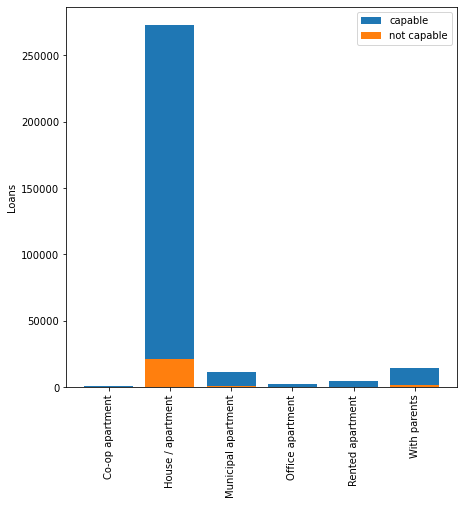

     NAME_HOUSING_TYPE  TARGET   total       Avg
0      Co-op apartment      89    1122  0.079323
1    House / apartment   21272  272868  0.077957
2  Municipal apartment     955   11183  0.085397
3     Office apartment     172    2617  0.065724
4     Rented apartment     601    4881  0.123131
5         With parents    1736   14840  0.116981


In [115]:
barplots(train_data, 'NAME_HOUSING_TYPE', 'TARGET')

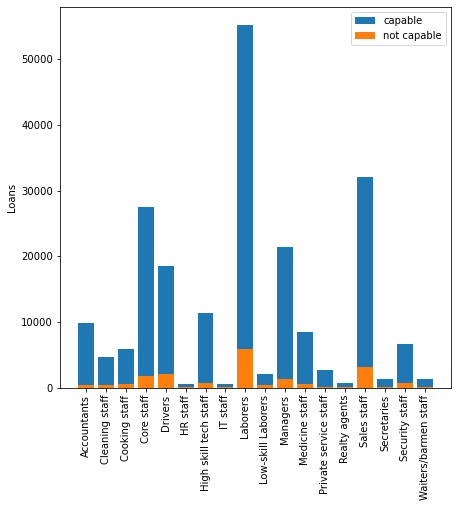

          OCCUPATION_TYPE  TARGET  total       Avg
0             Accountants     474   9813  0.048303
1          Cleaning staff     447   4653  0.096067
2           Cooking staff     621   5946  0.104440
3              Core staff    1738  27570  0.063040
4                 Drivers    2107  18603  0.113261
5                HR staff      36    563  0.063943
6   High skill tech staff     701  11380  0.061599
7                IT staff      34    526  0.064639
8                Laborers    5838  55186  0.105788
9      Low-skill Laborers     359   2093  0.171524
10               Managers    1328  21371  0.062140
11         Medicine staff     572   8537  0.067002
12  Private service staff     175   2652  0.065988
13          Realty agents      59    751  0.078562
14            Sales staff    3092  32102  0.096318
15            Secretaries      92   1305  0.070498
16         Security staff     722   6721  0.107424
17   Waiters/barmen staff     152   1348  0.112760


In [116]:
barplots(train_data, 'OCCUPATION_TYPE', 'TARGET', False)

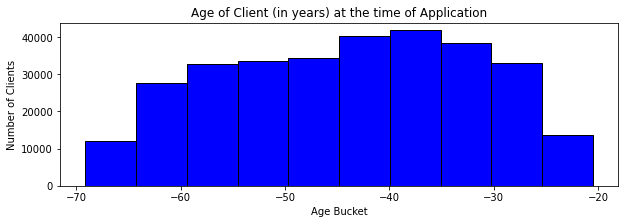

In [117]:
plt.figure(figsize=(10,3))
plt.hist(train_data['DAYS_BIRTH'].values/365, bins=10, edgecolor='black', color='blue')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()


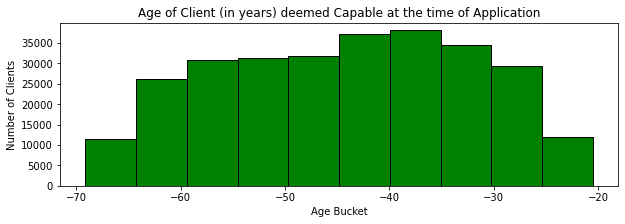

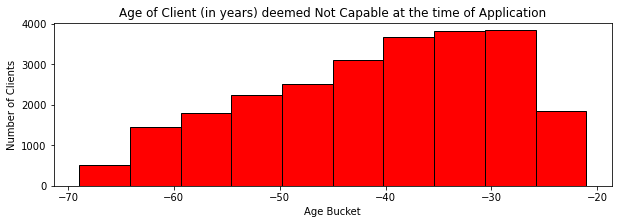

In [118]:
capable_days_birth = train_data[train_data['TARGET']==0]['DAYS_BIRTH'].values/365
not_capable_days_birth = train_data[train_data['TARGET']==1]['DAYS_BIRTH'].values/365


plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor='black', color='green')
plt.title('Age of Client (in years) deemed Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='red')
plt.title('Age of Client (in years) deemed Not Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

# Data preparation

In [119]:
print('Number of duplicates train data : ',train_data.duplicated().sum()) # checking duplicated data
print('Number of duplicates test data : ',train_data.duplicated().sum())

Number of duplicates train data :  0
Number of duplicates test data :  0


In [120]:
missing_data = train_data.isnull().sum(axis=0).reset_index()  #checking missing value for train data
missing_data.columns=['variable','missing values']
missing_data['filling factor %']=(train_data.shape[0]-missing_data['missing values'])/train_data.shape[0]*100
missing_data.reset_index(drop = True)

pd.set_option('display.max_rows', None)
missing_data.sort_values(by='missing values',ascending = False).head(70)

,variable,missing values,filling factor %
76,COMMONAREA_MEDI,214865,30.127703
48,COMMONAREA_AVG,214865,30.127703
62,COMMONAREA_MODE,214865,30.127703
70,NONLIVINGAPARTMENTS_MODE,213514,30.567037
56,NONLIVINGAPARTMENTS_AVG,213514,30.567037
84,NONLIVINGAPARTMENTS_MEDI,213514,30.567037
86,FONDKAPREMONT_MODE,210295,31.613828
68,LIVINGAPARTMENTS_MODE,210199,31.645047
54,LIVINGAPARTMENTS_AVG,210199,31.645047
82,LIVINGAPARTMENTS_MEDI,210199,31.645047


In [121]:
#handling missing data
train_data['NAME_FAMILY_STATUS'].fillna('Data_Not_Available', inplace=True)
train_data['NAME_HOUSING_TYPE'].fillna('Data_Not_Available', inplace=True)
train_data.replace(max(train_data['DAYS_EMPLOYED'].values), np.nan, inplace=True)

train_data['AMT_ANNUITY'].fillna(0, inplace=True)
#A total of 12 datapoints are there where Annuity Amount is null.

train_data['AMT_GOODS_PRICE'].fillna(0, inplace=True)
#A total of 278 datapoints are there where Annuity Amount is null.

train_data['NAME_TYPE_SUITE'].fillna('Data_Not_Available', inplace=True)
#Removing datapoints where 'Name_Type_Suite' is null.

train_data['NAME_FAMILY_STATUS'].replace('Unknown','Married', inplace=True)
#Removing datapoints where 'Name_Family_Status' is Unknown.

train_data['OCCUPATION_TYPE'].fillna(train_data['OCCUPATION_TYPE'].mode(), inplace=True)
train_data['FLAG_MOBIL'].fillna('Data_Not_Available', inplace=True)
train_data['FLAG_EMP_PHONE'].fillna('Data_Not_Available', inplace=True)
train_data['FLAG_CONT_MOBILE'].fillna('Data_Not_Available', inplace=True)
train_data['FLAG_EMAIL'].fillna('Data_Not_Available', inplace=True)

train_data['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)

#Replace NA with 0 for Count of Client Family Members
train_data['CNT_FAM_MEMBERS'].fillna(0,inplace=True)

train_data['EXT_SOURCE_1'].fillna(0, inplace=True)
train_data['EXT_SOURCE_2'].fillna(0, inplace=True)
train_data['EXT_SOURCE_3'].fillna(0, inplace=True)
train_data['SK_ID_CURR'].fillna(0,inplace=True)

In [122]:
missing_data = train_data.isnull().sum(axis=0).reset_index()  #checking missing value for train data
missing_data.columns=['variable','missing values']
missing_data['filling factor %']=(train_data.shape[0]-missing_data['missing values'])/train_data.shape[0]*100
missing_data.reset_index(drop = True)
missing_data.sort_values(by='missing values',ascending = False).head(65)

,variable,missing values,filling factor %
76,COMMONAREA_MEDI,214865,30.127703
48,COMMONAREA_AVG,214865,30.127703
62,COMMONAREA_MODE,214865,30.127703
70,NONLIVINGAPARTMENTS_MODE,213514,30.567037
56,NONLIVINGAPARTMENTS_AVG,213514,30.567037
84,NONLIVINGAPARTMENTS_MEDI,213514,30.567037
86,FONDKAPREMONT_MODE,210295,31.613828
68,LIVINGAPARTMENTS_MODE,210199,31.645047
82,LIVINGAPARTMENTS_MEDI,210199,31.645047
54,LIVINGAPARTMENTS_AVG,210199,31.645047


In [123]:
df = train_data.dropna(axis=1)

In [124]:
df.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [125]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002.0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311279,0.622070,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004.0,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.000000,0.556152,0.729492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006.0,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008018,-19005,-9832.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.000000,0.650391,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007.0,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028656,-19932,-4312.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.000000,0.322754,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       

# Correlation

In [177]:
df= train_data.loc[:,['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS','DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','FLAG_EMP_PHONE', 'DAYS_REGISTRATION',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE']]

In [178]:
df_correlation=df.corr(method='pearson').TARGET.sort_index().reset_index()

In [179]:
print('Most positive correlation')
df_correlationhead=df_correlation.sort_values(by='TARGET',ascending=False).iloc[1:11]
df_correlationhead

Most positive correlation


,index,TARGET
5,DAYS_BIRTH,0.078239
12,REG_CITY_NOT_WORK_CITY,0.050994
8,FLAG_EMP_PHONE,0.045982
6,DAYS_REGISTRATION,0.041975
11,LIVE_CITY_NOT_WORK_CITY,0.032518
10,FLAG_WORK_PHONE,0.028524
3,CNT_CHILDREN,0.019187
4,CNT_FAM_MEMBERS,0.009312
7,FLAG_CONT_MOBILE,0.000370
2,AMT_INCOME_TOTAL,-0.003982


In [180]:
print('Most negative correlation')
df_correlationtail=df_correlation.sort_values(by='TARGET',ascending=False).tail(10)
df_correlationtail

Most negative correlation


,index,TARGET
6,DAYS_REGISTRATION,0.041975
11,LIVE_CITY_NOT_WORK_CITY,0.032518
10,FLAG_WORK_PHONE,0.028524
3,CNT_CHILDREN,0.019187
4,CNT_FAM_MEMBERS,0.009312
7,FLAG_CONT_MOBILE,0.000370
2,AMT_INCOME_TOTAL,-0.003982
0,AMT_ANNUITY,-0.012794
9,FLAG_PHONE,-0.023806
1,AMT_CREDIT,-0.030369


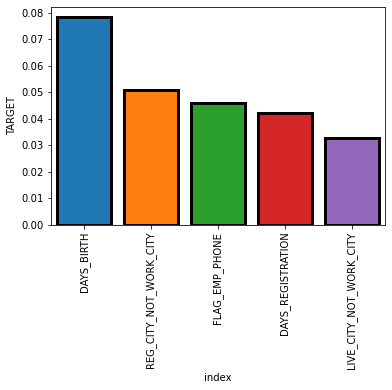

In [181]:
chart = sns.barplot(data=df_correlationhead.head(),x="index",y="TARGET",saturation=1, edgecolor = "#000000", linewidth = 3)

for item in chart.get_xticklabels():
  item.set_rotation(90)

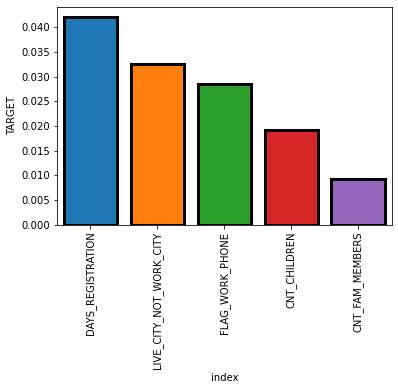

In [182]:
chart = sns.barplot(data=df_correlationtail.head(),x="index",y="TARGET",saturation=1, edgecolor = "#000000", linewidth = 3)

for item in chart.get_xticklabels():
  item.set_rotation(90)

Text(0.5, 1.0, '\nHeatmap for top 10 most positive correlation\n')

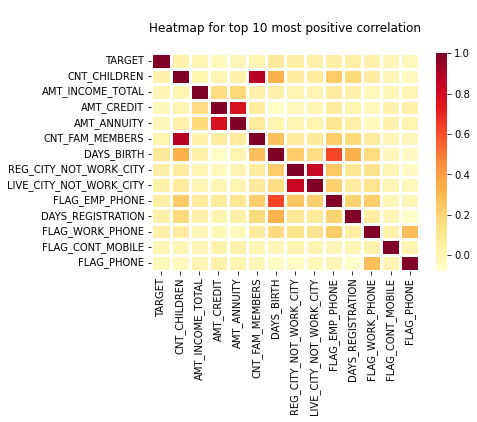

In [133]:
sns.heatmap(df.corr(),cmap="YlOrRd", edgecolor = "#1c1c1c", linewidth = 3)
plt.title(f'\nHeatmap for top 10 most positive correlation\n')

In [183]:
catcol = [col for col in df.columns if df[col].dtype == "object"] #encoding data
le = LabelEncoder()
for col in catcol:
        df[col] = le.fit_transform(df[col])

In [184]:
df.dtypes

TARGET                        int8
NAME_CONTRACT_TYPE           int32
CODE_GENDER                  int32
FLAG_OWN_CAR                 int32
FLAG_OWN_REALTY              int32
CNT_CHILDREN                  int8
AMT_INCOME_TOTAL           float32
AMT_CREDIT                 float32
AMT_ANNUITY                float32
NAME_TYPE_SUITE              int32
NAME_INCOME_TYPE             int32
NAME_EDUCATION_TYPE          int32
NAME_FAMILY_STATUS           int32
NAME_HOUSING_TYPE            int32
CNT_FAM_MEMBERS            float16
DAYS_BIRTH                   int16
REG_CITY_NOT_WORK_CITY        int8
LIVE_CITY_NOT_WORK_CITY       int8
ORGANIZATION_TYPE            int32
FLAG_EMP_PHONE                int8
DAYS_REGISTRATION          float16
FLAG_WORK_PHONE               int8
FLAG_CONT_MOBILE              int8
FLAG_PHONE                    int8
dtype: object

# Machine Learning

In [185]:
X=df.drop(['TARGET'],1)
y=df[['TARGET']].values.reshape(-1,1)

In [186]:

oversample=RandomOverSampler(sampling_strategy=0.5)
X_over,y_over=oversample.fit_resample(X,y)

In [187]:
train_X,test_X,train_y,test_y = train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [188]:
from sklearn.model_selection import cross_val_score

XGBboost Classifier

In [140]:
xgboost= XGBClassifier()
xgboost.fit(train_X,train_y)
cv_scores = cross_val_score(xgboost, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: 0.7207832490657504


In [141]:
xgboost_pred=xgboost.predict(test_X)
xgboost_conf=confusion_matrix(test_y,xgboost_pred)
xgboost_report=classification_report(test_y,xgboost_pred)
xgboost_acc=round(accuracy_score(test_y,xgboost_pred)*100,ndigits=3)
xgboost_rocauc=roc_auc_score(test_y, xgboost_pred)
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[51710  4789]
 [19235  9072]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.92      0.81     56499
           1       0.65      0.32      0.43     28307

    accuracy                           0.72     84806
   macro avg       0.69      0.62      0.62     84806
weighted avg       0.70      0.72      0.68     84806


The Accuracy of XGB is 71.672 %
ROC AUC Score with XGBOOST: 0.6178617683377833


Decision Tree Classifier

In [142]:
dtr=DecisionTreeClassifier()
dtr.fit(train_X,train_y)
cv_scores = cross_val_score(dtr, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: 0.9296392486788635


<AxesSubplot:>

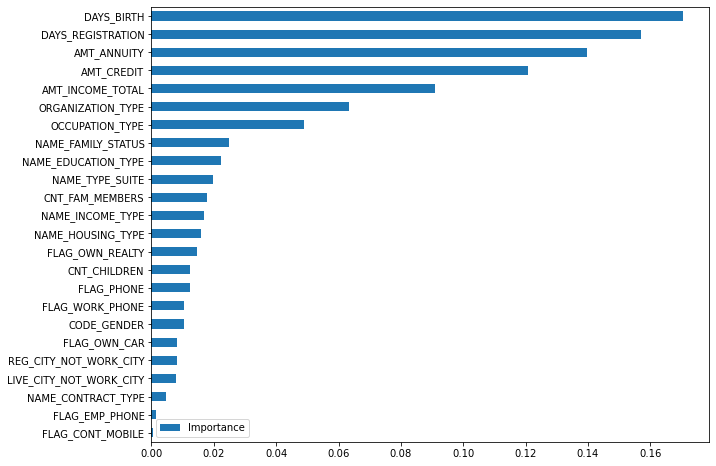

In [143]:
feat_importances = pd.DataFrame(dtr.feature_importances_, index=test_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))


In [144]:
dtr_pred=dtr.predict(test_X)
dtr_conf=confusion_matrix(test_y,dtr_pred)
dtr_report=classification_report(test_y,dtr_pred)
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3)
dtr_rocauc=roc_auc_score(test_y, dtr_pred)
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[50585  5914]
 [  163 28144]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     56499
           1       0.83      0.99      0.90     28307

    accuracy                           0.93     84806
   macro avg       0.91      0.94      0.92     84806
weighted avg       0.94      0.93      0.93     84806


The Accuracy of Decision Tree is 92.834 %
ROC AUC Score with Decision Tree: 0.9447836439910017


Gaussian naive bayes classifier

In [145]:
gnb=GaussianNB()
gnb.fit(train_X,train_y)
cv_scores = cross_val_score(gnb, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: 0.6602968186407902


In [146]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[55636   863]
 [27944   363]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      0.98      0.79     56499
           1       0.30      0.01      0.02     28307

    accuracy                           0.66     84806
   macro avg       0.48      0.50      0.41     84806
weighted avg       0.54      0.66      0.54     84806


The Accuracy of Gaussian is 66.032 %
ROC AUC Score with Gaussian Naive Bayes: 0.4987745382788491


Gradien Boost Classifier

In [147]:
gradien=GradientBoostingClassifier()
gradien.fit(train_X,train_y)
cv_scores = cross_val_score(gradien, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: 0.684738540926885


In [148]:
gradien_pred=gradien.predict(test_X)
gradien_conf=confusion_matrix(test_y,gradien_pred)
gradien_report=classification_report(test_y,gradien_pred)
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3)
gradien_rocauc=roc_auc_score(test_y, gradien_pred)
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[53321  3178]
 [23644  4663]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.69      0.94      0.80     56499
           1       0.59      0.16      0.26     28307

    accuracy                           0.68     84806
   macro avg       0.64      0.55      0.53     84806
weighted avg       0.66      0.68      0.62     84806


The Accuracy of Gradien Boost is 68.373 %
ROC AUC score wiht Gradien Boost: 0.5542403945131602


Random Forest Classifier

In [189]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(train_X,train_y)
cv_scores = cross_val_score(rfc, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Scores: 0.9982972882838326


In [190]:
rfc_pred = rfc.predict(test_X)
rfc_conf = confusion_matrix(test_y, rfc_pred)
rfc_report = classification_report(test_y, rfc_pred)
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2)
rfc_rocauc=roc_auc_score(test_y, rfc_pred)
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest: {rfc_rocauc}')

Confusion Matrix : 

[[56413    86]
 [  217 28090]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56499
           1       1.00      0.99      0.99     28307

    accuracy                           1.00     84806
   macro avg       1.00      1.00      1.00     84806
weighted avg       1.00      1.00      1.00     84806


The Accuracy of Random Forest Classifier is 99.64 %
ROC AUC score wiht Random Forest: 0.9954059504067372


Logistic Regression

In [151]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
cv_scores = cross_val_score(lr, X_over, y_over, cv=5).mean()  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: 0.6665888418546765


In [152]:
lr_pred = lr.predict(test_X)
lr_conf = confusion_matrix(test_y, lr_pred)
lr_report = classification_report(test_y, lr_pred)
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2)
lr_rocauc=roc_auc_score(test_y, lr_pred)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Reggresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Reggresion: {lr_rocauc}')

Confusion Matrix : 

[[56494     5]
 [28307     0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     56499
           1       0.00      0.00      0.00     28307

    accuracy                           0.67     84806
   macro avg       0.33      0.50      0.40     84806
weighted avg       0.44      0.67      0.53     84806


The Accuracy of Logistic Reggresion is 66.62 %
ROC AUC score wiht Logistic Reggresion: 0.4999557514292288


In [153]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc],],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,99.710000,0.996140
1,Decision Tree Classifier,92.834000,0.944784
0,XGBoost Classifier,71.672000,0.617862
3,Gradien Boost Classifier,68.373000,0.554240
5,Logistic Regression,66.620000,0.499956
2,Gaussian naive bayes classifier,66.032000,0.498775


In [154]:
test_y = test_y.reshape(-1)
compare = pd.DataFrame( {'Actual' : test_y.flatten() ,
                        'Predictions' : rfc_pred.flatten() ,
                        'Error' : rfc_pred.flatten() - test_y.flatten()} )

compare.Error.sum()

-133

In [155]:
test_y.shape

(84806,)

# Submission

In [191]:
X_test= test_data.loc[:,[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
        'CNT_FAM_MEMBERS','DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','FLAG_EMP_PHONE', 'DAYS_REGISTRATION',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE']]

In [192]:
missing_data_test = X_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test

AMT_ANNUITY         24
NAME_TYPE_SUITE    911
dtype: int64

In [193]:

X_test['AMT_ANNUITY'].fillna(0, inplace=True)
#A total of 12 datapoints are there where Annuity Amount is null.


X_test['NAME_TYPE_SUITE'].fillna('Data_Not_Available', inplace=True)
#Removing datapoints where 'Name_Type_Suite' is null.



In [194]:
missing_data_test = X_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test

Series([], dtype: int64)

In [195]:
le=LabelEncoder()
catcol=[col for col in X_test.columns if X_test[col].dtype == 'object']
for col in catcol:
    X_test[col]=le.fit_transform(X_test[col])

In [196]:
X_test.shape, test_X.shape

((48744, 23), (84806, 23))

In [197]:
X_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_EMP_PHONE,DAYS_REGISTRATION,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE
0,0,0,0,1,0,135000.0,568800.0,20560.5,7,6,1,1,1,2.0,-19241,0,0,28,1,-5168.0,0,1,0
1,0,1,0,1,0,99000.0,222768.0,17370.0,7,6,4,1,1,2.0,-18064,0,0,42,1,-9120.0,0,1,0
2,0,1,1,1,0,202500.0,663264.0,69777.0,1,6,1,1,1,2.0,-20038,0,0,54,1,-2176.0,0,1,0
3,0,0,0,1,2,315000.0,1575000.0,49018.5,7,6,4,1,1,4.0,-13976,0,0,5,1,-2000.0,0,1,1
4,0,1,1,0,1,180000.0,625500.0,32067.0,7,6,4,1,1,3.0,-13040,1,1,5,1,-4000.0,1,1,0


In [198]:
test_pred = rfc.predict(X_test)